In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
# https://i-systems.github.io/teaching/ML/iNotes/06_Logistic_Regression.html

In [4]:
m = 100 
w = np.array([[-6], [2], [1]])
X = np.hstack([np.ones([m, 1]), 4 * np.random.rand(m, 1), 4 * np.random.rand(m, 1)])

w = np.asmatrix(w)
X = np.asmatrix(X)

y = 1 / (1 + np.exp(-X*w)) > 0.5   # sigmoid function 

C0 = np.where(y == True)[0]
C1 = np.where(y == False)[0]

y = np.empty([m, 1])
y[C0] = 0 
y[C1] = 1

In [5]:
print(X.shape)
print(y.shape)

(100, 3)
(100, 1)


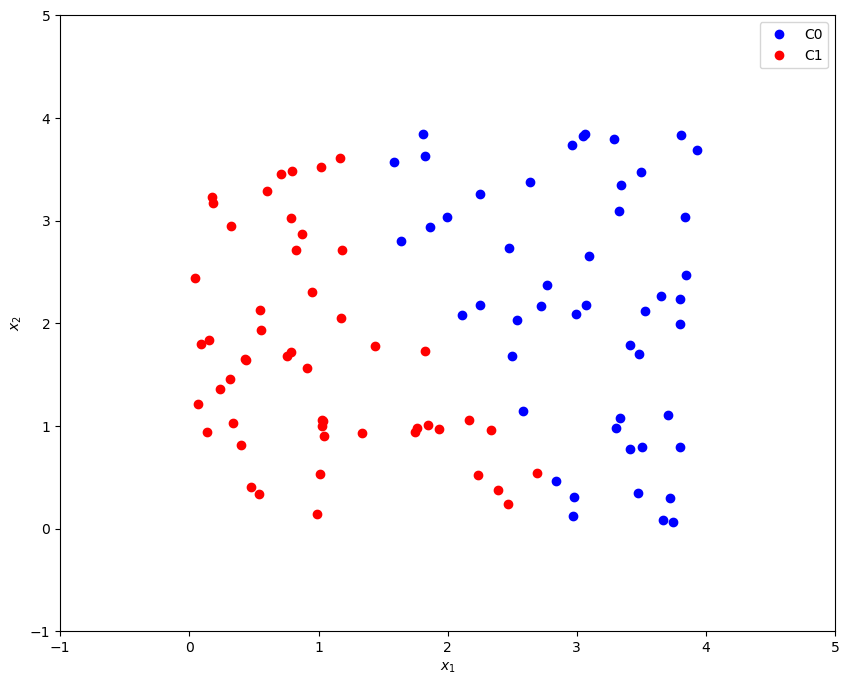

In [6]:
plt.figure(figsize=(10, 8))
plt.plot(X[C0, 1], X[C0, 2], 'bo', label='C0')
plt.plot(X[C1, 1], X[C1, 2], 'ro', label='C1')
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')
plt.legend()
plt.xlim([-1, 5])
plt.ylim([-1, 5])
plt.show()

In [7]:
# define sigmoid function 
# h == sigmoid function 

def h(x, w):
    return 1 / (1 + np.exp(-x*w))

In [8]:
w = np.zeros([3, 1])

lr = 0.01

for i in range(10000):
    df = X.T * (y - h(X, w))
    w  = w + lr * df 

In [9]:
print("w:\n", w)

w:
 [[ 29.44686639]
 [-10.14476619]
 [ -4.66730654]]


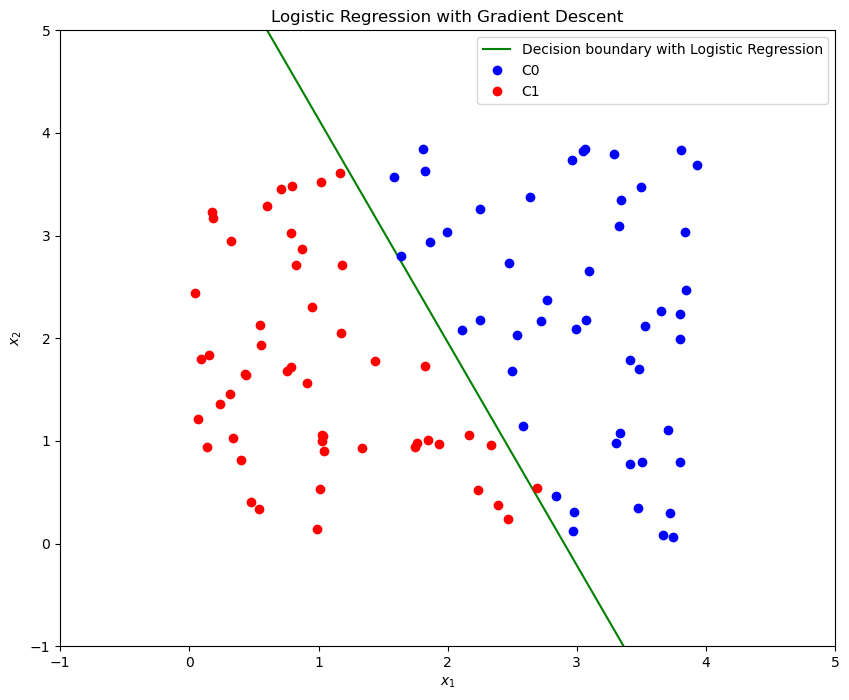

In [10]:
xp = np.linspace(0, 4, 100).reshape(-1, 1)
yp = -w[1, 0] / w[2, 0] * xp - w[0, 0] / w[2, 0]

plt.figure(figsize=(10, 8))
plt.plot(xp, yp, 'g', label='Decision boundary with Logistic Regression')
plt.plot(X[C0, 1], X[C0, 2], 'bo', label='C0')
plt.plot(X[C1, 1], X[C1, 2], 'ro', label='C1')
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')
plt.legend()
plt.xlim([-1, 5])
plt.ylim([-1, 5])
plt.title('Logistic Regression with Gradient Descent')
plt.show()

In [11]:
y = np.empty([m,1])
y[C1] = 1
y[C0] = -1
y = np.asmatrix(y)

w = cvx.Variable([3, 1])

obj = cvx.Minimize(cvx.sum(cvx.logistic(-cvx.multiply(y,X*w))))
prob = cvx.Problem(obj).solve()

w = w.value

xp = np.linspace(0,4,100).reshape(-1,1)
yp = - w[1,0]/w[2,0]*xp - w[0,0]/w[2,0]

plt.figure(figsize = (10,8))
plt.plot(X[C1,1], X[C1,2], 'ro', alpha = 0.3, label = 'C1')
plt.plot(X[C0,1], X[C0,2], 'bo', alpha = 0.3, label = 'C0')
plt.plot(xp, yp, 'g', linewidth = 4, label = 'Logistic Regression')
plt.title('Logistic Regression', fontsize = 15)
plt.xlabel(r'$x_1$', fontsize = 15)
plt.ylabel(r'$x_2$', fontsize = 15)
plt.legend(loc = 1, fontsize = 12)
plt.axis('equal')
plt.xlim([0,4])
plt.ylim([0,4])
plt.show()

NameError: name 'cvx' is not defined